# 2 - Exploring Classification Models with Scikit-Learn on MNIST data

This notebook attempts to elaborate and build on the example in Aurelien Geron's book "Hands-on Machine Learning with Scikit-Learn and TensorFlow":

In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "MINST_ORG"

def save_fig(filename, tight_layout=True):
    data_path = os.path.join(PROJECT_ROOT_DIR, "images", FOLDER)    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    fullpath_filename = os.path.join(data_path, filename + ".png")
    print("Saving image : ", fullpath_filename)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fullpath_filename, format='png', dpi=300)

In [2]:
# As discussed in "https://github.com/ageron/handson-ml/issues/7"
# Download data : "wget https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
# https://github.com/amplab/datascience-sp14/tree/master/lab7/mldata/mnist-original.mat

from scipy.io import loadmat
mnist_path = "datasets/numbers/mnist-original.mat" #the MNIST file has been previously downloaded here
mnist_raw = loadmat(mnist_path)
mnlist_data = {
"data": mnist_raw["data"].T,
"target": mnist_raw["label"][0],
"COL_NAMES": ["label", "data"],
"DESCR": "mldata.org dataset: mnist-original",
}
print("MNIST data file from storage is loaded successfully!")
print("MNIST data shape:" + str(mnlist_data["data"].shape))
print("MNIST target shape:" + str(mnlist_data["target"].shape))

#mnlist_data["data"], mnlist_data["target"] gives same result
mnlist_data

MNIST data file from storage is loaded successfully!
MNIST data shape:(70000, 784)
MNIST target shape:(70000,)


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [3]:
X, y = mnlist_data["data"], mnlist_data["target"]

X.shape, y.shape

((70000, 784), (70000,))

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

Value i : 0 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_0.png


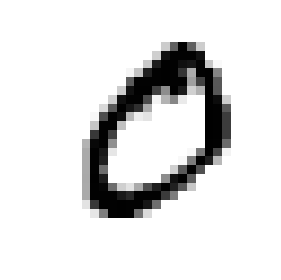

Value i : 6500 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_6500.png


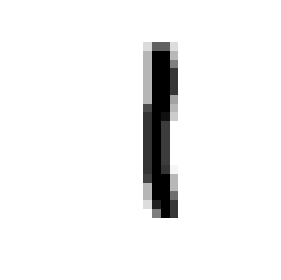

Value i : 13000 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_13000.png


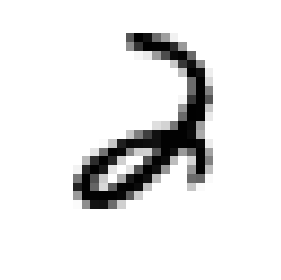

Value i : 19500 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_19500.png


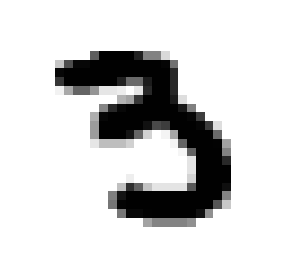

Value i : 26000 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_26000.png


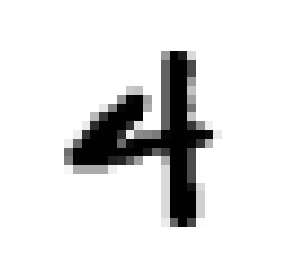

Value i : 32500 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_32500.png


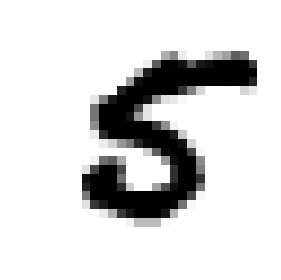

Value i : 39000 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_39000.png


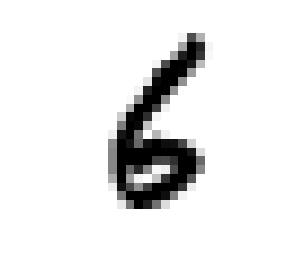

Value i : 45500 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_45500.png


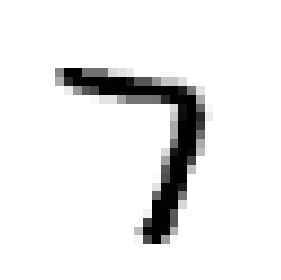

Value i : 52000 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_52000.png


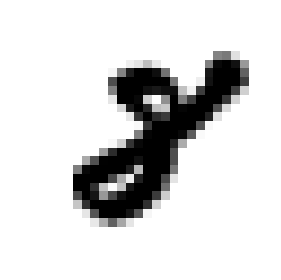

Value i : 58500 and Image with shape : (784,)
Saving image :  ./images/MINST_ORG/Mnist_digit7_plot_58500.png


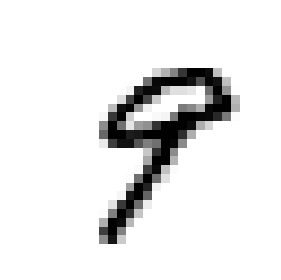

In [5]:
digit_index = 0

# steps of 6500 to display all digits
for i in range(digit_index, 60000, 6500):
    if i >= X.shape[0]:
        i = X.shape[0]-1
    
    sample_digit = X[i]
    plot_digit(sample_digit)
    
    print("Value i : " + str(i) + " and Image with shape : " + str(sample_digit.shape))
    
    # Must save before show
    save_fig("Mnist_digit7_plot_" + str(i))
    plt.show() # optional not showing (-0.5, 27.5, 27.5, -0.5)

# Used defined functions to plot digit
# from IPython.display import Image
# Image(filename='./images/MINST_ORG/Mnist_digit7_plot_58500.png')

In [6]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = ((len(instances) - 1) // images_per_row) + 1
    
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    
    #print("images_per_row :", images_per_row) # gives 10
    #print("n_rows :", n_rows) # gives 10
    #print("n_empty :", n_empty) # gives 0
    
    images.append(np.zeros((size, size * n_empty)))
    
    # row starts from 0 to (n_rows-1)
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row] # only 10 images from 0 to 9 
        #print("No. of rimages :", len(rimages)) # gives 10 images in a row
        row_images.append(np.concatenate(rimages, axis=1))
        #print("No. of row_images :", np.shape(row_images)) # gives (1, 28, 280), (2, 28, 280), ... (10, 28, 280)
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving image :  ./images/MINST_ORG/more_digits_plot.png


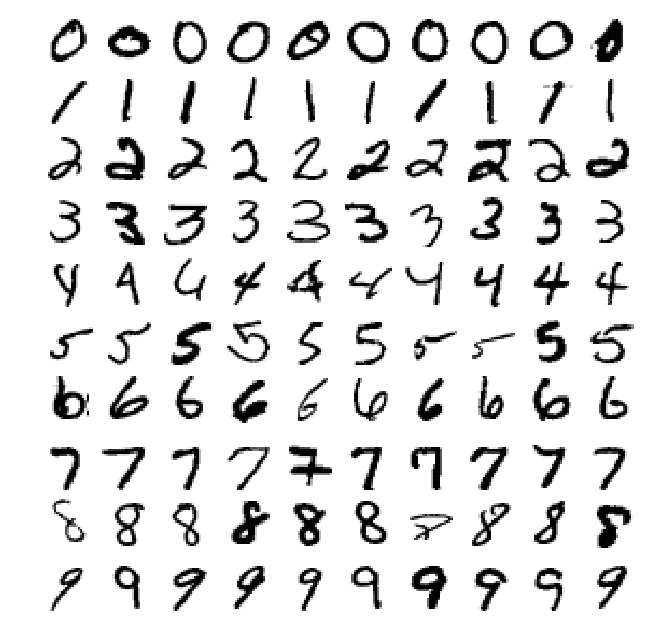

In [7]:
plt.figure(figsize=(9,9))

# numpy.r builds up arrays quickly
#print("First Batch of numbers :", (12000/600)) # gives 20.0
#print("Second Batch of numbers :", ((30600-13000)/600)) # 29.333333333333332
#print("Third Batch of numbers :", ((60000-30600)/590)) # 49.83050847457627

example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
# print("No. of example_images :", str(len(example_images))) gives 100

plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

#plot_digit(X[12000]) # gives 1
#plot_digit(X[13000]) # gives 2
#plot_digit(X[30600]) # gives 5 
#plot_digit(X[50000]) # gives 8
#plot_digit(X[60000]) # gives 0
# Helper
#A = X[:100:5]
#A.shape # gives (20, 784)

In [8]:
# Splits X into Training set with first 60K images and Test set with last 10K images
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Shuffle the training set for Stochastic Gradient Descent (SGD)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [9]:
# Train a Binary Classifier, "7-detector"
y_train_7 = (y_train == 7) # True for all labels of 7 and False otherwise
y_test_7 = (y_test == 7)

#print("Shape of y_train_7 :", str(y_train_7.shape)) # gives (60000,)
#print("Shape of y_test_7 :", str(y_test_7.shape)) # gives (10000,)

In [10]:
# Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier

# The stopping criterion, tol is set to 
# Reproducible result by setting "random_state"
sgd_classifier = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_classifier.fit(X_train, y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# X[30600] = 5.0; X[45500] = 7.0
sgd_classifier.predict([X[12000], X[13000], X[30600], X[45500], X[50000], X[60000]])

array([False, False, False,  True, False, False])

In [12]:
# Measuring Accuracy using own implementation of Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_7):
    clone_classifier = clone(sgd_classifier)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_7[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_7[test_index]
    
    clone_classifier.fit(X_train_folds, y_train_folds)
    y_pred = clone_classifier.predict(X_test_fold)
    nos_correct = sum(y_pred == y_test_fold)
    print("Accuracy : ", nos_correct / len(y_pred))

Accuracy :  0.9725513724313785
Accuracy :  0.9772
Accuracy :  0.9816990849542477


In [13]:
# Scikit-Learn Cross-Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.97255137, 0.9772    , 0.98169908])

In [14]:
# Dumb Classifier compared with accuracy above
from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # Returns False

In [15]:
never7_classifier = Never7Classifier()

cross_val_score(never7_classifier, X_train, y_train_7, cv=3, scoring="accuracy")
# Accuracy is generally not the preferred performance measure for classifiers especially for skewed datasets

array([0.8959 , 0.8953 , 0.89555])

In [16]:
# Computation of the confusion matrix
# Scikit-Learn Cross-Validation Prediction
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_classifier, X_train, y_train_7, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_predict)

# Perfect Predictions would have only non-zero values on the main diagonal

array([[52875,   860],
       [  511,  5754]])

In [17]:
# Precision, Recall and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision = TP / (TP + FP), Recall = TP / (TP + FN)
print("Precision : ", str(precision_score(y_train_7, y_train_predict)))
print("Recall : ", str(recall_score(y_train_7, y_train_predict)))
print("F1 Score : ", str(f1_score(y_train_7, y_train_predict)))

Precision :  0.869972785001512
Recall :  0.9184357541899442
F1 Score :  0.8935476356860005


In [18]:
# Setting threshold to make predictions from access to decision scores
x1 = X[36000]; x2 = X[45500]

y_scores = sgd_classifier.decision_function([x1, x2]) # labels 5 and 7

decision_threshold = 190000
y_digit_predictions = (y_scores > decision_threshold)

# When decision_threshold is set to zero, prediction result is as per predict() method
print("Decision Scores : ", str(y_scores))
print("Predictions : ", str(y_digit_predictions))
print("Actual Labels :", y[30600], "and", y[45500]) # Corresponding label values

Decision Scores :  [-323468.31582797  385065.93179409]
Predictions :  [False  True]
Actual Labels : 5.0 and 7.0


In [ ]:
# Get scores for all instances in the training set to decide which threshold to use
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_7, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

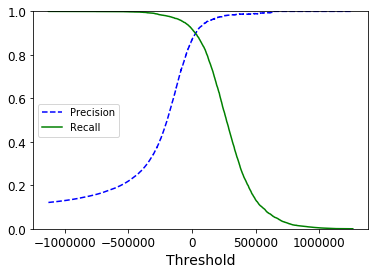

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

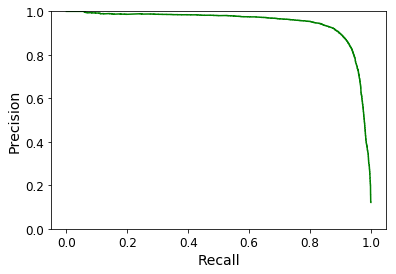

In [ ]:
# Plotting Precision against Recall to select the threshold value, PR curve
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "g-", label="Precision")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0,1])

plot_precision_vs_recall(precisions, recalls)
plt.show()

In [ ]:
# Creating a 90% precision classifier
decision_threshold = 20000
y_trained_predictions_90pc = (y_scores > decision_threshold)

# When decision_threshold is set to zero, prediction result is as per predict() method
print("90% Precision : ", str(precision_score(y_train_7, y_trained_predictions_90pc)))
print("with Recall : ", str(recall_score(y_train_7, y_trained_predictions_90pc)))

90% Precision :  0.8918110236220472
with Recall :  0.9039106145251397


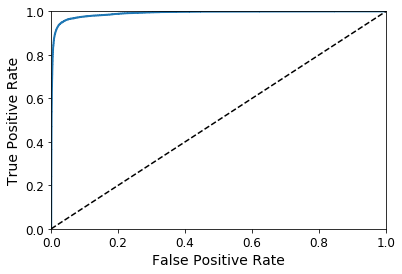

In [ ]:
# Receiver Operating Characteristic (ROC) curve, True Positive Rate vs False Positive Rate
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

# Plotting Precision against Recall to select the threshold value
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr,linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

# Good Classifier stays far away from the diagonal line

In [ ]:
# Compare classifiers by measuring the "area under the curve" (AUC) = 1 means perfect classifier
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_7, y_scores)

# Prefer PR curve whenever positive class is rare or care more about false positives than false negatives
# Otherwise use ROC curve

0.9904643364160871

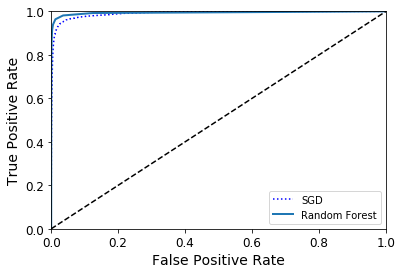

SGD Classifier's ROC AUC score :  0.9904643364160871
Random Forest Classifier's ROC AUC score is better :  0.9938061045785639


In [ ]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=10, random_state=42) # Added estimators of 10

# predict_proba() returns an array containing row per instance and a column per class that gives shape (60000, 2)
y_probabilities = cross_val_predict(forest_classifier, X_train, y_train_7, cv=3, method="predict_proba")

# Use the positive class probabilities as the score for plotting
y_scores_forest = y_probabilities[:, 1] # score = probability of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

print("SGD Classifier's ROC AUC score : ", str(roc_auc_score(y_train_7, y_scores)))
print("Random Forest Classifier's ROC AUC score is better : ", str(roc_auc_score(y_train_7, y_scores_forest)))

In [ ]:
# The probabilities for the given digit belonging to the given class "Not 7" and "7"
# X[30600] = 5.0; X[45500] = 7.0
y_probabilities[30600], y_probabilities[45500]

(array([1., 0.]), array([1., 0.]))

In [ ]:
# When Binary classification algorithm is used for Multiclass Classification, OneVsAll strategy will be used
a_digit = X[45500] # X[30600] = 5.0; X[45500] = 7.0
sgd_classifier.fit(X_train, y_train)
sgd_classifier.predict([a_digit])

array([7.])

In [ ]:
# The scores for predicted value of the digit
a_digit_scores = sgd_classifier.decision_function([a_digit])
a_digit_scores

array([[-648649.97564195, -714088.8198482 , -494931.97291428,
        -251861.50198154, -350381.34290462, -594428.83118117,
        -672089.37051108,  385065.93179409, -443599.4644891 ,
        -549112.00297809]])

In [ ]:
print("The max. value in the array of scores : ", str(np.argmax(a_digit_scores)))
print("The classes in the SGD Classifier : ", str(sgd_classifier.classes_))
print("The index 5 of classes in the SGD Classifier : ", str(sgd_classifier.classes_[5]))

The max. value in the array of scores :  7
The classes in the SGD Classifier :  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
The index 5 of classes in the SGD Classifier :  5.0


In [ ]:
# OneVsOne Classifier or OneVsRest Classifier
from sklearn.multiclass import OneVsOneClassifier

ovo_classifier = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_classifier.fit(X_train, y_train)

print("The predicted value using OneVsOne Classifier : ", str(ovo_classifier.predict([a_digit])))

# For OneVsOne Classifier, there will be N*(N-1)/2 classifiers
print("No. of trained classifiers in OneVsOne Classifier : ", str(len(ovo_classifier.estimators_)))

The predicted value using OneVsOne Classifier :  [7.]
No. of trained classifiers in OneVsOne Classifier :  45


In [ ]:
# Training a Random Forest Classifier that can directly classify instances into multiple classes
forest_classifier.fit(X_train, y_train)

print("The predicted value using Random Forest Classifier : ", str(forest_classifier.predict([a_digit])))
print("List of probabilities assigned to each instance for each class : ", str(forest_classifier.predict_proba([a_digit])))


The predicted value using Random Forest Classifier :  [7.]
List of probabilities assigned to each instance for each class :  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
# Evaluate accuracy of the Stochastic Gradient Descent (SGD) Classifier
cross_val_score(sgd_classifier, X_train, y_train, cv=3, scoring="accuracy")

array([0.87582484, 0.8819941 , 0.86968045])

In [ ]:
# Scaling the inputs improves the accuracy of the Stochastic Gradient Descent (SGD) Classifier 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_classifier, X_train_scaled, y_train, cv=3, scoring="accuracy")

# If encounter Memory Error, need to split the dataset for casting to float64 and concatenate them
#X_train_scaledA = std_scaler.fit_transform(X_train[0:10000].astype(np.float64))
# ...
#X_train_scaledF = std_scaler.fit_transform(X_train[50000:60000].astype(np.float64))
#X_train_scaledG = np.concatenate((X_train_scaledA, ..., X_train_scaledF))
#X_train_scaledG.shape

array([0.90846831, 0.91054553, 0.91078662])

In [ ]:
# Error Analysis with confusion matrix
y_train_predict = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv=3)
confusion_mat = confusion_matrix(y_train, y_train_predict)

confusion_mat

array([[5726,    3,   25,   12,   11,   51,   44,   10,   37,    4],
       [   2, 6498,   41,   28,    6,   42,    5,   10,   98,   12],
       [  58,   43, 5335,  107,   71,   28,   85,   56,  160,   15],
       [  52,   49,  137, 5354,    5,  213,   36,   57,  135,   93],
       [  23,   29,   39,    9, 5371,    9,   51,   33,   78,  200],
       [  73,   44,   40,  189,   69, 4612,  102,   28,  178,   86],
       [  39,   22,   43,    2,   42,   89, 5623,    7,   50,    1],
       [  23,   22,   76,   35,   54,   10,    5, 5785,   17,  238],
       [  51,  170,   76,  143,   15,  161,   56,   28, 5010,  141],
       [  46,   34,   30,   82,  156,   38,    2,  199,   80, 5282]])

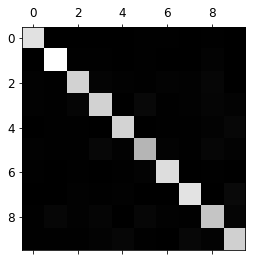

In [ ]:
# Image representation of the confusion matrix
plt.matshow(confusion_mat, cmap=plt.cm.gray)
plt.show()

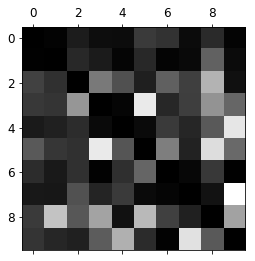

In [ ]:
# Compare error rates instead of absolute errors by dividing each value with
# the number of images in the corresponding class
row_sums = confusion_mat.sum(axis=1, keepdims=True)
normalized_confusion_mat = confusion_mat / row_sums

# Fill the diagonal with zeros to keep only the errors
np.fill_diagonal(normalized_confusion_mat, 0)
plt.matshow(normalized_confusion_mat, cmap=plt.cm.gray)
plt.show()

# Rows = Actual classes; Columns = Predicted classes
# Bright in columns 8 and 9 mean high errors with wrong classifications of 8 and 9

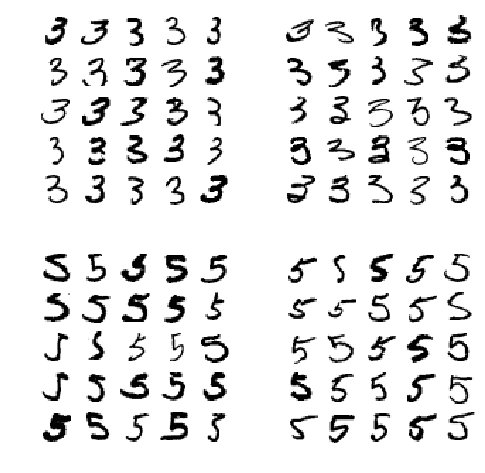

In [ ]:
class_a, class_b = 3, 5
X_train_a_predict_a = X_train[(y_train == class_a) & (y_train_predict == class_a)]
X_train_a_predict_b = X_train[(y_train == class_a) & (y_train_predict == class_b)]
X_train_b_predict_a = X_train[(y_train == class_b) & (y_train_predict == class_a)]
X_train_b_predict_b = X_train[(y_train == class_b) & (y_train_predict == class_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_train_a_predict_a[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_train_a_predict_b[:25], images_per_row=5)  # actual 3, predict 5 
plt.subplot(223); plot_digits(X_train_b_predict_a[:25], images_per_row=5) # actual 5, predict 3
plt.subplot(224); plot_digits(X_train_b_predict_b[:25], images_per_row=5) 
plt.show()

In [ ]:
# Multilabel Classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # Concatenate column-wise

knn_Classifier = KNeighborsClassifier()
# KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None,
# n_jobs=None, n_neighbors=5, p=2, weights='uniform' is the default configurations)
knn_Classifier.fit(X_train, y_multilabel)

# (1.0, 2.0, 5.0, 7.0, 8.0, 0.0) are the respective label values
knn_Classifier.predict([X[12000], X[13000], X[30600], X[45500], X[50000], X[60000]])

array([[False,  True],
       [False, False],
       [False,  True],
       [ True,  True],
       [ True, False],
       [False, False]])

<b>Warning:</b>
<br>The following KNN Prediction and F1 score computations may take a very long time (possibly hours depending on your hardware).

In [ ]:
# Compute the average F1 score across all labels of the KNeighbors Classifier
# EC2 M2 instance runs at 100% CPU to compute the following prediction and f1 score
y_train_knn_predict = cross_val_predict(knn_Classifier, X_train, y_multilabel, cv=3, n_jobs=-1)
print("The KNN prediction is of shape : ", str(y_train_knn_predict.shape))

f1_score(y_multilabel, y_train_knn_predict, average="macro")

In [ ]:
# Multioutput Multiclass Classification / Multioutput Classification
# Add noise to training set
noise = np.random.randint(0, 100, (len(X_train), X_train.shape[1]))
X_train_noise = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), X_test.shape[1]))
X_test_noise = X_test + noise

# Same shape as X_train and different from y_train, y_test
y_train_mod = X_train
y_test_mod = X_test

digit_index = 5500
plt.subplot(121); plot_digit(X_test_noise[digit_index])
plt.subplot(122); plot_digit(y_test_mod[digit_index])
save_fig("Noisy_digit_example_plot")
plt.show()

# X_train is shuffled
knn_Classifier.fit(X_train_noise, y_train_mod)
clean_predict_digit = knn_Classifier.predict([X_test_noise[digit_index]])
plot_digit(clean_predict_digit)
save_fig("Cleaned_digit_example_plot")

print("The clean predicted digit is of shape : ", str(clean_predict_digit.shape))

## Alternatives

Obtain MNIST datasets:

In [ ]:
y[12000], y[13000], y[30600], y[45500], y[50000], y[60000]

In [ ]:
# Download MNIST files from http://yann.lecun.com/exdb/mnist/ and uncompressed them with gunzip
from mnist import MNIST

mndata = MNIST('datasets/mnist')

images, labels = mndata.load_training()
#images, labels = mndata.load_testing()
len(images), len(labels)

In [ ]:
import random

# To display an image to the console:
index = random.randrange(0, len(images))  # choose an index ;-)
print(mndata.display(images[index])) # Different data from mnist-original.mat with index = 36000

In [ ]:
# Creating Boolean arrays
B = [1, 2]
len(B)
np.ones((len(B), 1), dtype=bool)